## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
df["Mouse ID"].value_counts()

g989    13
a644    10
a685    10
t451    10
l509    10
        ..
f932     1
v199     1
n482     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep = False, inplace = True)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].value_counts()

a644    10
r811    10
p189    10
t451    10
l509    10
        ..
o848     1
v199     1
n482     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_df = df.groupby(["Drug Regimen"])

medianSummary = regimen_df["Tumor Volume (mm3)"].median()
meanSummary = regimen_df["Tumor Volume (mm3)"].mean()
varianceSummary = regimen_df["Tumor Volume (mm3)"].var()
meanSummary = regimen_df["Tumor Volume (mm3)"].mean()
stdSummary = regimen_df["Tumor Volume (mm3)"].std()
semSummary = regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame(data=medianSummary)

summary_df["Mean"] = meanSummary
summary_df["Variance"] = varianceSummary
summary_df["Standard Deviation"] = stdSummary
summary_df["SEM"] = semSummary
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Median"})

summary_df

,Median,Mean,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.854632,52.458254,44.053659,6.637293,0.540135
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


## Bar Plots

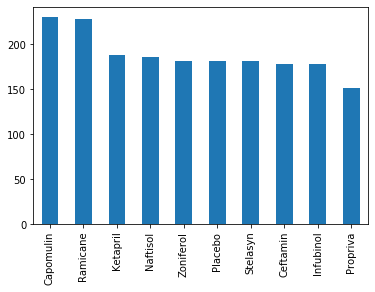

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
df['Drug Regimen'].value_counts().plot(kind='bar');


<BarContainer object of 10 artists>

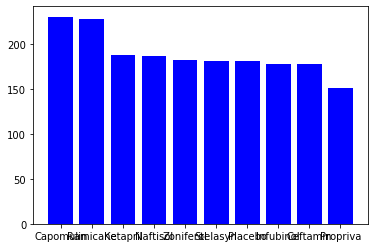

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatment = ["Capomulin", "Ramicane", "Ketapril", 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
count = [230,228,188,186,182,181,181,178,178,151]
plt.bar(treatment, count, color="b", align="center")


## Pie Plots

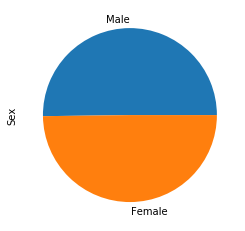

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = df.groupby(["Mouse ID"])
sex_df = sex_df.max()

sex_df

sex_df['Sex'].value_counts().plot(kind='pie');


([<matplotlib.patches.Wedge at 0x21b3021a5c8>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

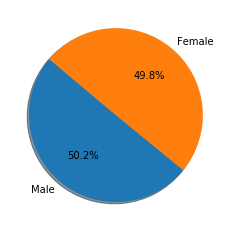

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","orange"]
labels = ["Male", "Female"]
explode = (0,0)
plt.pie(sex_df['Sex'].value_counts(), labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart_df = df.groupby(["Mouse ID"])
quart_df = quart_df["Timepoint"].max()
quart_df = quart_df.reset_index()




final_df = quart_df.merge(df, on =["Mouse ID", "Timepoint"], how = "left")

quartiles = final_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

df.loc[df["Tumor Volume (mm3)"] < 17.400437649999986]
df.loc[df["Tumor Volume (mm3)"] > 93.49183637000002]
# No Outliers
final_df

Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


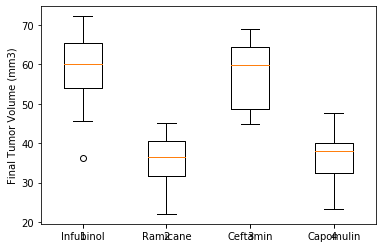

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data =[final_df.loc[final_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"],
       final_df.loc[final_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"],
      final_df.loc[final_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"],
      final_df.loc[final_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ramicane', "Ceftamin", "Capomulin"])
#ax1.boxplot(final_df.loc[final_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"])
#ax1.boxplot(final_df.loc[final_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"])
ax1.boxplot(data)
plt.show()



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

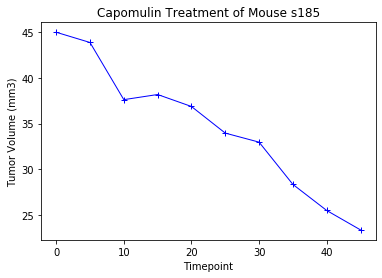

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = df.loc[df['Mouse ID'] == "s185"]

plt.plot(line_df["Timepoint"], line_df["Tumor Volume (mm3)"], marker="+",color="blue", linewidth=1, label="Fahreneit")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

<function matplotlib.pyplot.show(*args, **kw)>

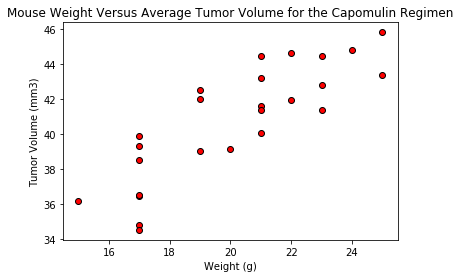

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = df.loc[df['Drug Regimen'] == "Capomulin"]
capomulin_df = capomulin_df.groupby(["Mouse ID"])
capomulin_df = capomulin_df.mean()

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume for the Capomulin Regimen")
plt.show


## Correlation and Regression

The r-squared is: 0.7088568047708717


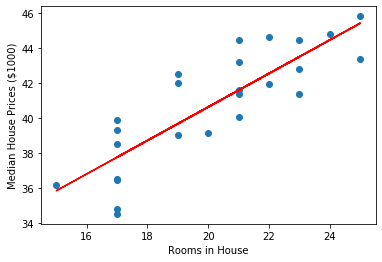

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()